In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Upgrade packages
!pip install --upgrade scipy networkx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2
    Uninstalling networkx-3.2:
      Successfully uninstalled networkx-3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
# Import the NetworkX package
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


In [5]:
# Add one node with node level attributes
G.add_node(0, feature=5, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 5, 'label': 0}


In [6]:
G.nodes(data=True)

NodeDataView({0: {'feature': 5, 'label': 0}})

In [7]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
]) #(node, attrdict)

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 5, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


In [8]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [9]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


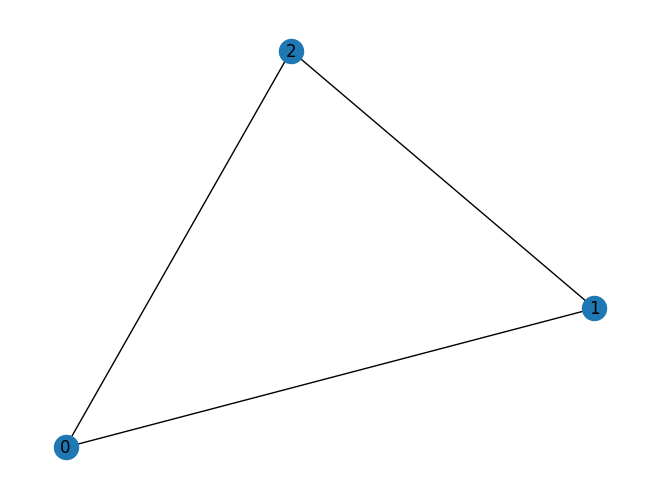

In [10]:
# Draw the graph
nx.draw(G, with_labels = True)

In [11]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


In [12]:
# creation of a random network with N nodes and E edges - this a erdos-renyi graph
def create(n,m):
    G = nx.gnm_random_graph(n, m, seed = random_state)
    return G

In [13]:
def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(2, 4)


    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

In [14]:
random_state = np.random.RandomState(42)
N=20 #number of nodes
E=2*N #number of edges
G=create(N,E)
print(G.edges(nbunch=4))
print(G.adj)
print(G.edges)
print(type(G))
print(len(G.edges))

[(4, 18), (4, 9)]
{0: {11: {}, 12: {}, 2: {}, 1: {}}, 1: {11: {}, 5: {}, 19: {}, 9: {}, 0: {}}, 2: {7: {}, 19: {}, 14: {}, 0: {}}, 3: {10: {}, 13: {}, 17: {}, 7: {}, 9: {}}, 4: {18: {}, 9: {}}, 5: {1: {}}, 6: {19: {}, 7: {}, 8: {}, 17: {}, 14: {}}, 7: {6: {}, 2: {}, 11: {}, 3: {}, 13: {}, 15: {}, 10: {}}, 8: {6: {}, 17: {}, 14: {}}, 9: {15: {}, 3: {}, 1: {}, 4: {}}, 10: {14: {}, 18: {}, 3: {}, 7: {}}, 11: {1: {}, 0: {}, 16: {}, 18: {}, 7: {}, 17: {}}, 12: {17: {}, 14: {}, 0: {}}, 13: {3: {}, 16: {}, 7: {}}, 14: {10: {}, 6: {}, 2: {}, 15: {}, 12: {}, 8: {}}, 15: {9: {}, 14: {}, 7: {}}, 16: {11: {}, 13: {}, 18: {}}, 17: {6: {}, 8: {}, 3: {}, 11: {}, 12: {}}, 18: {10: {}, 11: {}, 4: {}, 16: {}}, 19: {6: {}, 2: {}, 1: {}}}
[(0, 11), (0, 12), (0, 2), (0, 1), (1, 11), (1, 5), (1, 19), (1, 9), (2, 7), (2, 19), (2, 14), (3, 10), (3, 13), (3, 17), (3, 7), (3, 9), (4, 18), (4, 9), (6, 19), (6, 7), (6, 8), (6, 17), (6, 14), (7, 11), (7, 13), (7, 15), (7, 10), (8, 17), (8, 14), (9, 15), (10, 14), 

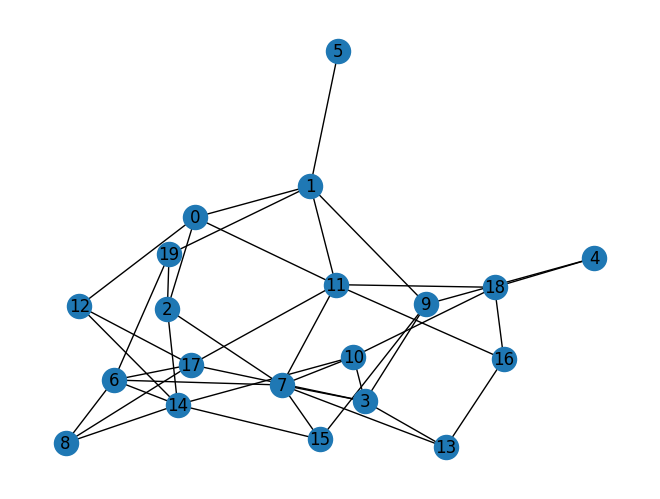

In [15]:
pos_cons = nx.spring_layout(G,seed = random_state)
nx.draw(G, pos=pos_cons,labels ={node:node for node in G.nodes()}) #spring_layout , spectral_layout
plt.draw()


In [16]:
# Get the adjacency matrix
A = nx.adjacency_matrix(G).toarray()
print("Adjacency Matrix:")
print(A)



# Get the degree matrix
D = np.diag(list(dict(G.degree()).values()))
print("Degree Matrix:")
print(D)

# Get the Laplacian matrix
L = D - A
print("Laplacian Matrix:")
print(L)

Adjacency Matrix:
[[0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1]
 [0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0]
 [1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0]
 [0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]
Degree Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0 0 

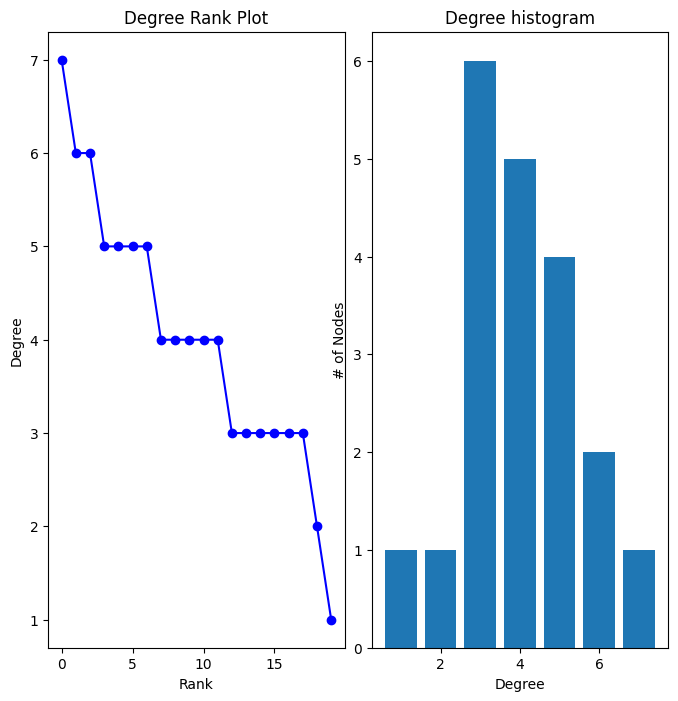

In [17]:
degree_analysis(G)

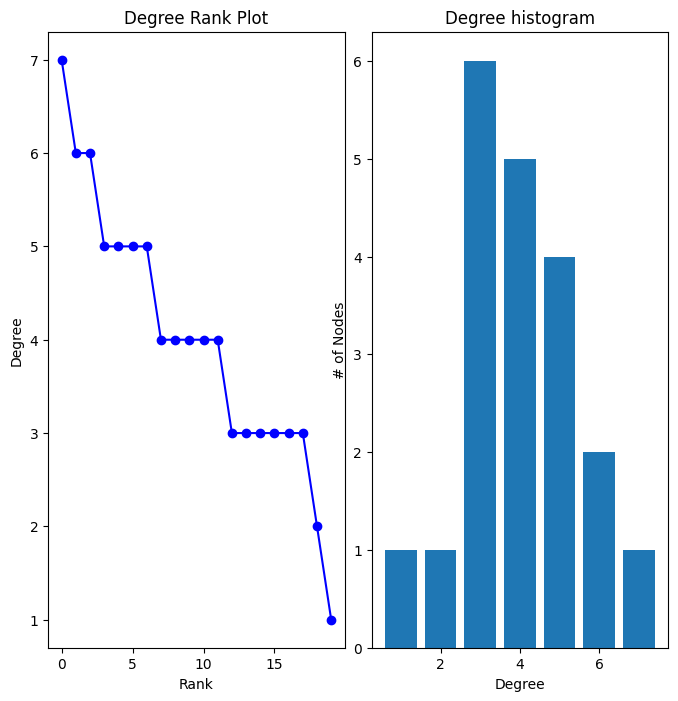

In [17]:
degree_analysis(G)

In [22]:
# question 1
# part 3
#This code will generate Erdos-Renyi graphs for various values of N (number of nodes),
# calculate their respective graph densities, and plot the degree distributions for each graph.
#It uses the formula for graph density (D = |E| / (|V| * (|V| - 1) / 2)) to compute the density.

For N = 20, the graph density is 0.21052631578947367


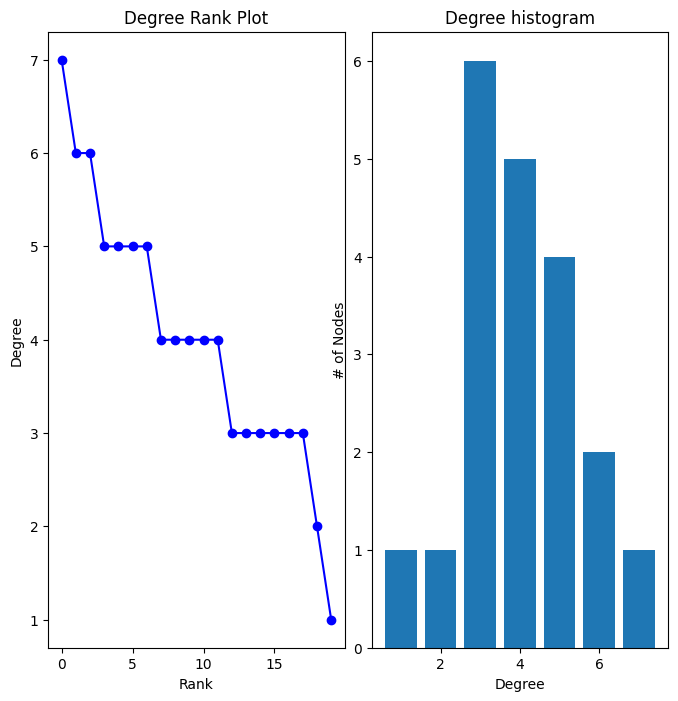

For N = 50, the graph density is 0.08163265306122448


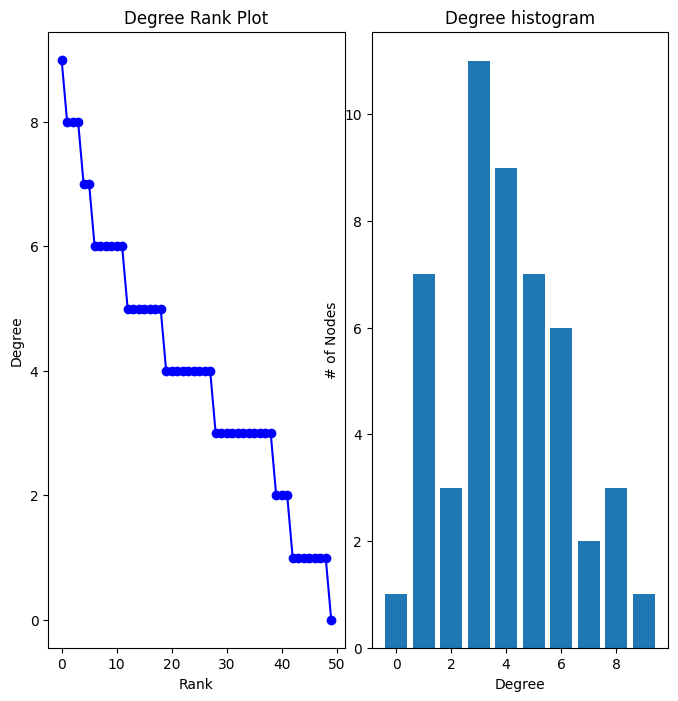

For N = 100, the graph density is 0.04040404040404041


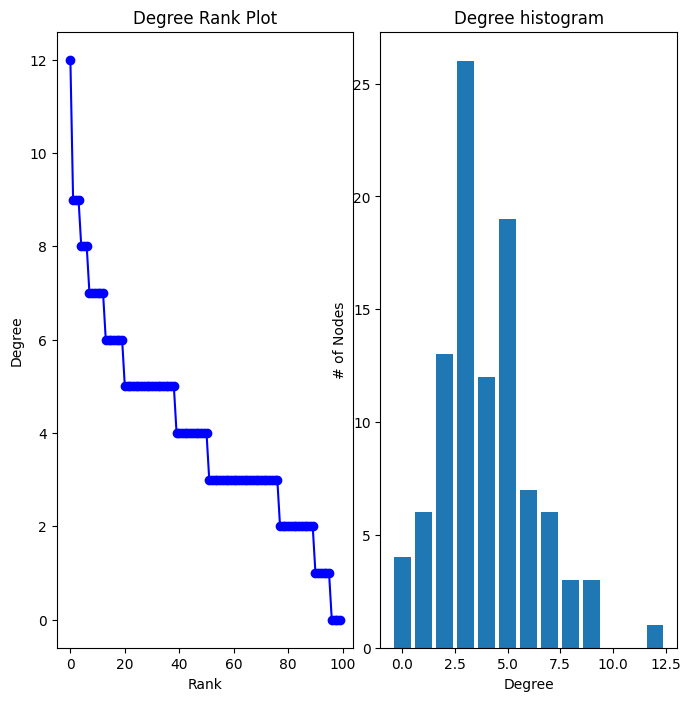

For N = 150, the graph density is 0.026845637583892617


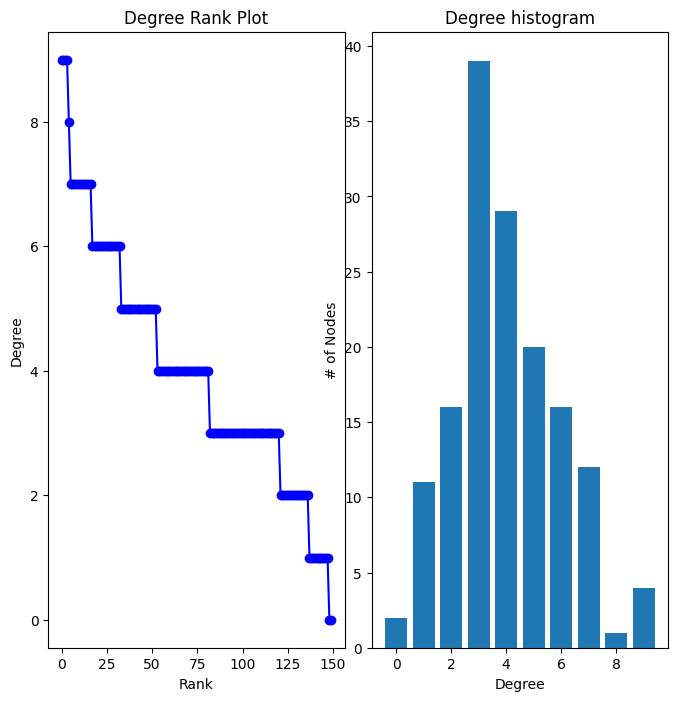

For N = 200, the graph density is 0.020100502512562814


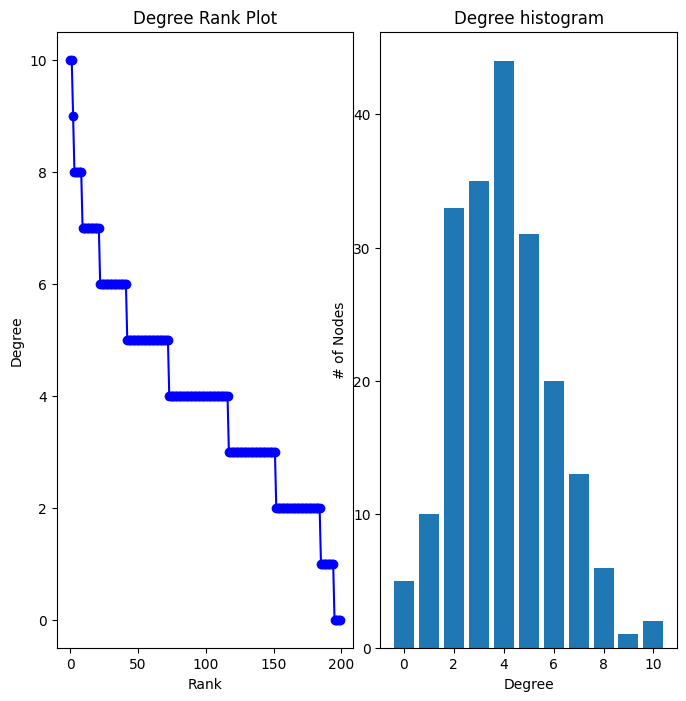

In [20]:
# Import necessary libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def create(n, m, random_state):
    G = nx.gnm_random_graph(n, m, seed=random_state)
    return G

def degree_analysis(G):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    axgrid = fig.add_gridspec(2, 4)

    ax1 = fig.add_subplot(axgrid[:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    plt.show()

def calculate_density(G):
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = num_edges / (num_nodes * (num_nodes - 1) / 2)  # Using the graph density formula

    return density

random_state = np.random.RandomState(42)
N_values = [20, 50, 100, 150, 200]  # Different values of N

for N in N_values:
    E = 2 * N  # Calculating number of edges
    G = create(N, E, random_state)

    density = calculate_density(G)
    print(f"For N = {N}, the graph density is {density}")

    degree_analysis(G)
